In [33]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()

<Figure size 640x480 with 0 Axes>

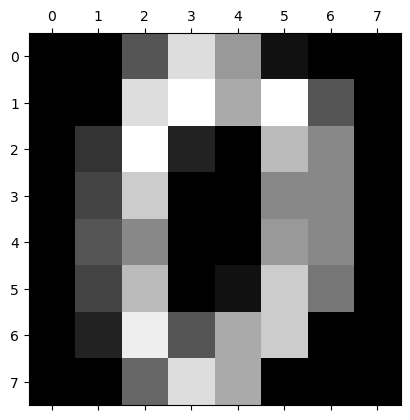

Label: 0


<Figure size 640x480 with 0 Axes>

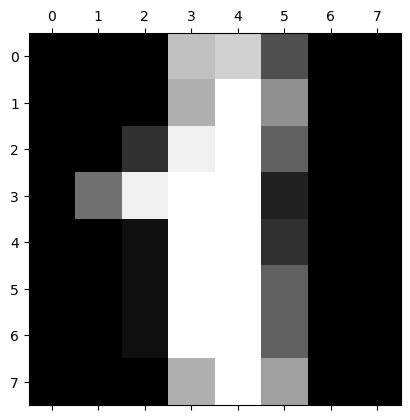

Label: 1


<Figure size 640x480 with 0 Axes>

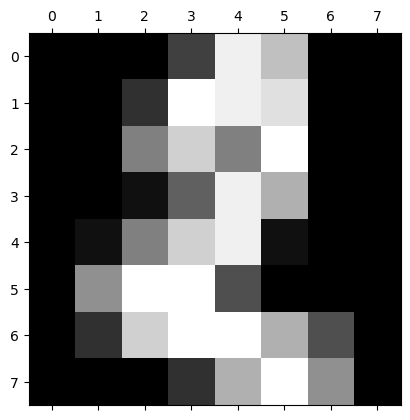

Label: 2


<Figure size 640x480 with 0 Axes>

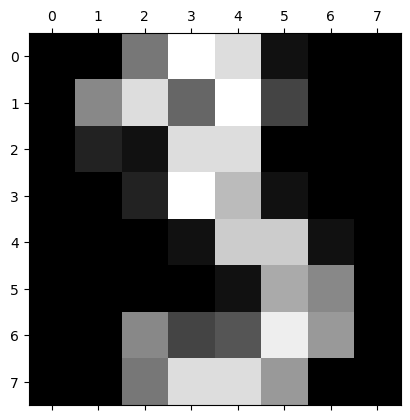

Label: 3


<Figure size 640x480 with 0 Axes>

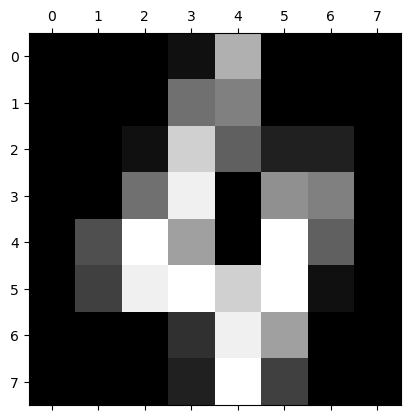

Label: 4


<Figure size 640x480 with 0 Axes>

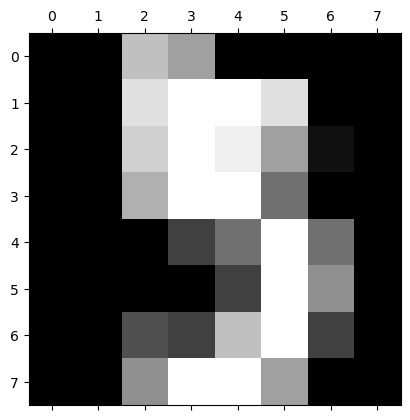

Label: 5


<Figure size 640x480 with 0 Axes>

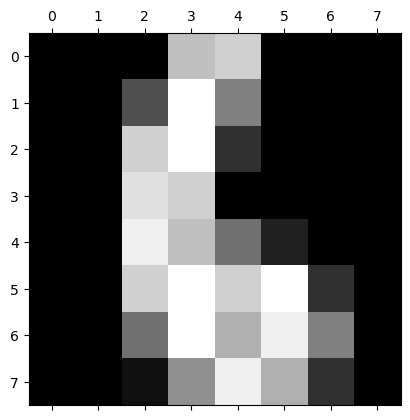

Label: 6


<Figure size 640x480 with 0 Axes>

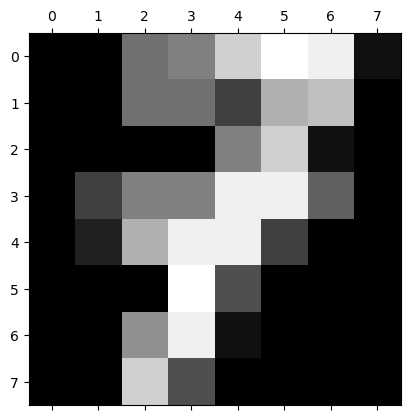

Label: 7


<Figure size 640x480 with 0 Axes>

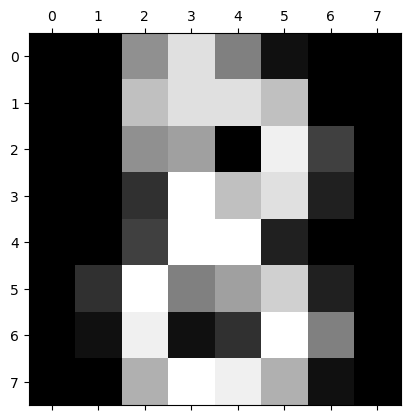

Label: 8


<Figure size 640x480 with 0 Axes>

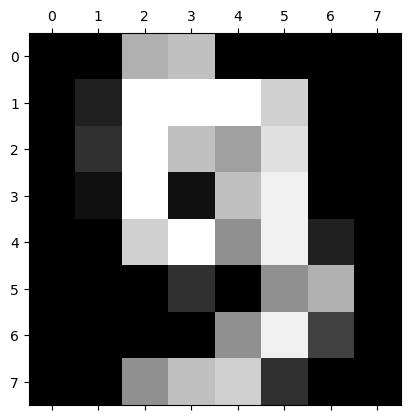

Label: 9


<Figure size 640x480 with 0 Axes>

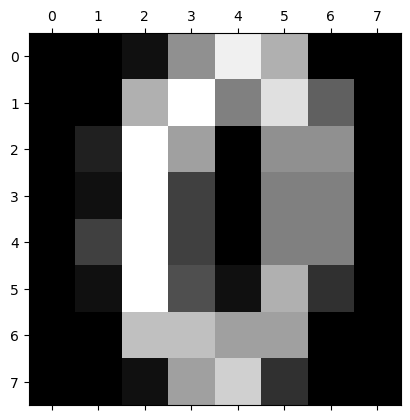

Label: 0


<Figure size 640x480 with 0 Axes>

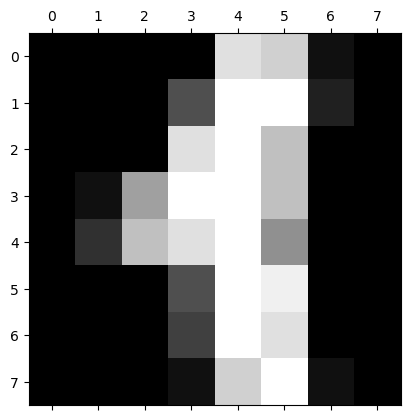

Label: 1


<Figure size 640x480 with 0 Axes>

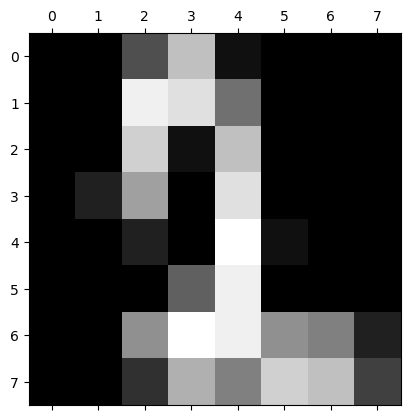

Label: 2


<Figure size 640x480 with 0 Axes>

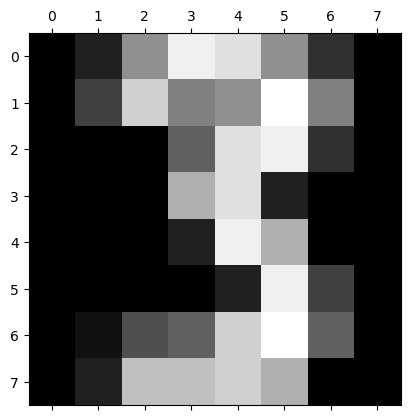

Label: 3


<Figure size 640x480 with 0 Axes>

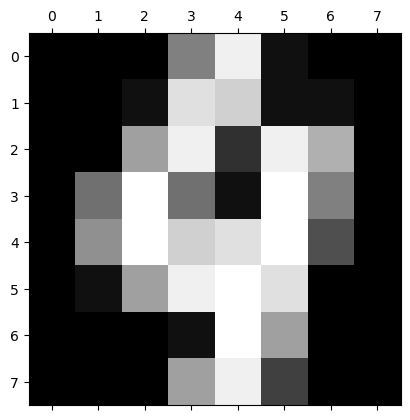

Label: 4


<Figure size 640x480 with 0 Axes>

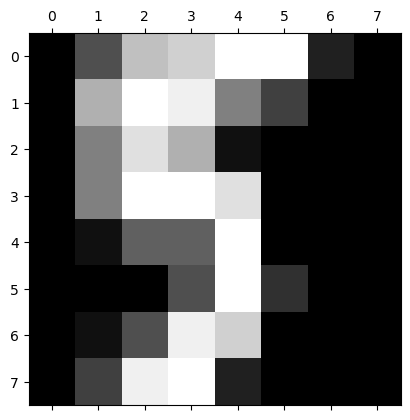

Label: 5


<Figure size 640x480 with 0 Axes>

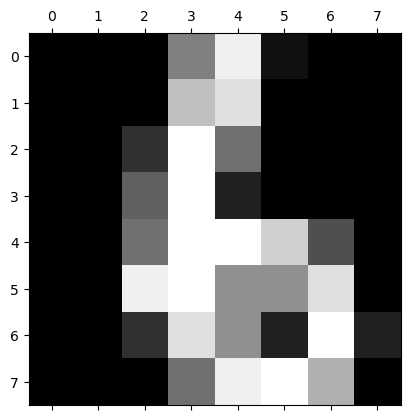

Label: 6


<Figure size 640x480 with 0 Axes>

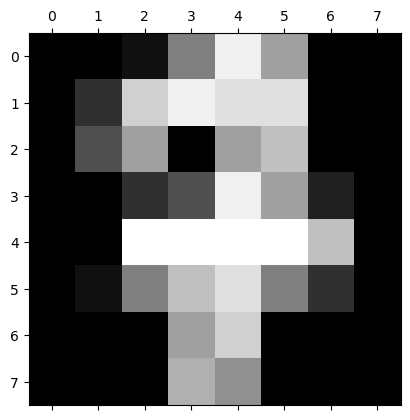

Label: 7


<Figure size 640x480 with 0 Axes>

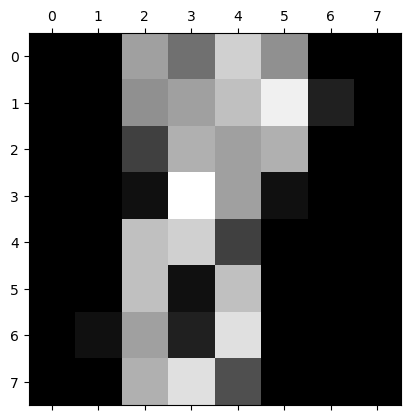

Label: 8


<Figure size 640x480 with 0 Axes>

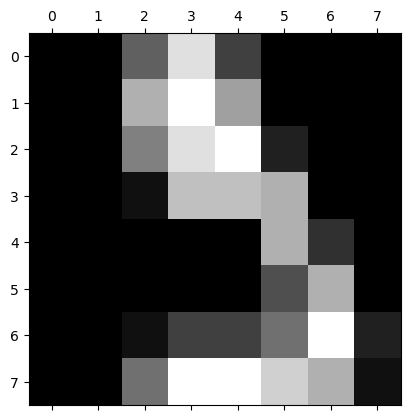

Label: 9


In [34]:
# Visualize the first image
for i in range (20):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()
    print(f"Label: {digits.target[i]}")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 1. Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# 2. Initialize the model (SVM is great for this dataset)
clf = SVC(gamma=0.001)

# 3. Train
clf.fit(X_train, y_train)

# 4. Predict
predicted = clf.predict(X_test)

In [36]:
clf.score(X_test,y_test)

0.9888888888888889

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




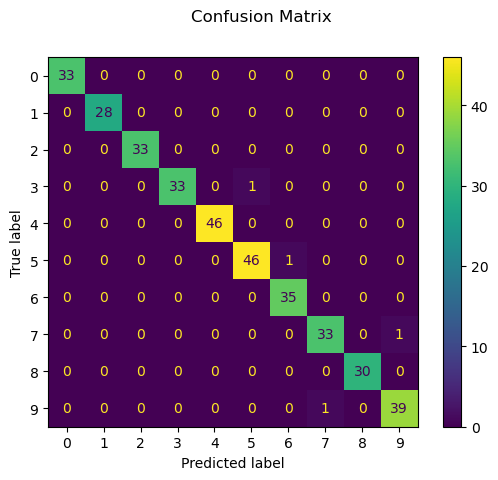

In [37]:
from sklearn import metrics

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

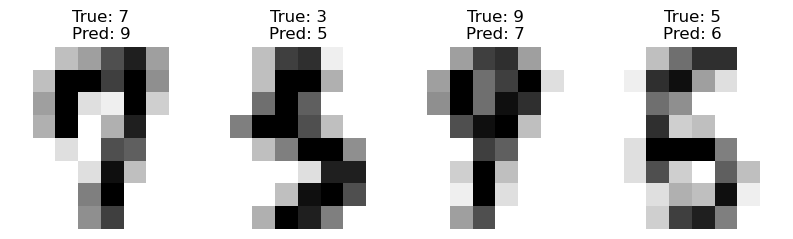

In [38]:
import numpy as np

# Find the indices where the prediction doesn't match the actual label
misclassified_idx = np.where(y_test != predicted)[0]

# Set up a plot to see the first few errors
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx[:5]): # Look at the first 5 errors
    plt.subplot(1, 5, i + 1)
    # Reshape the flattened data back to 8x8 for display
    plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"True: {y_test[idx]}\nPred: {predicted[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()